In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


C:\Users\USER\.anaconda\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('telecom_churn_data.csv')

In [3]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [6]:
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
obj_data = data.select_dtypes(include='object').columns

In [8]:
obj_data

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [9]:
cols_to_be_dropped = ['mobile_number', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 
                      'last_date_of_month_8', 'last_date_of_month_9', 
                      'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

In [10]:
data.drop(columns = cols_to_be_dropped, inplace=True)
data.shape

(99999, 216)

In [11]:
meaningful_missing_columns = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 
    'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7', 
    'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 
    'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 
    'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']

In [12]:
data[meaningful_missing_columns] = data[meaningful_missing_columns].apply(lambda x: x.fillna(0))

In [13]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 216 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    loc_og_t2o_mou            98981 non-null  float64
 1    std_og_t2o_mou            98981 non-null  float64
 2    loc_ic_t2o_mou            98981 non-null  float64
 3    arpu_6                    99999 non-null  float64
 4    arpu_7                    99999 non-null  float64
 5    arpu_8                    99999 non-null  float64
 6    arpu_9                    99999 non-null  float64
 7    onnet_mou_6               96062 non-null  float64
 8    onnet_mou_7               96140 non-null  float64
 9    onnet_mou_8               94621 non-null  float64
 10   onnet_mou_9               92254 non-null  float64
 11   offnet_mou_6              96062 non-null  float64
 12   offnet_mou_7              96140 non-null  float64
 13   offnet_mou_8              94621 non-null  fl

In [14]:
null_value_count = data[data.columns[data.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (data[data.columns[data.isna().any()]].isna().sum() * 100 / data.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data[ null_data['Percentage'] > 40].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_9', 'date_of_last_rech_data_8'],
      dtype='object')

In [15]:
data.drop(columns=null_data[ null_data['Percentage'] > 40].index, inplace=True)

In [16]:
data['total_rech_amt_data_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_rech_amt_data_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_rech_amt_6_combined'] = data['total_rech_amt_6'] + data['total_rech_amt_data_6'] # Calculate total recharge amount for both mobile and data
data['total_rech_amt_7_combined'] = data['total_rech_amt_7'] + data['total_rech_amt_data_7']

data['av_rech_amt_6_7'] = (data['total_rech_amt_6_combined'] + data['total_rech_amt_7_combined']) / 2 # Calculate average recharge done by the customer in June and July (6 & 7)

percentile_70_value = data['av_rech_amt_6_7'].quantile(q=0.7)
percentile_70_value
data[data['av_rech_amt_6_7']>= percentile_70_value].shape  # Retain only those customers who have recharged their mobiles with >= 70th percentile
df_hv = data[data['av_rech_amt_6_7']>= percentile_70_value].copy()
df_hv.shape

(30001, 217)

In [17]:
df_hv[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isna().sum() # Checking if the related columns don't have NULL values as we will be deriving the target variable based on this
f_hv['total_ic_og_mou_9'] = df_hv['total_ic_mou_9'] + df_hv['total_og_mou_9'] # Calculating 2g and 3g data consumption
df_hv['vol_2g_3g_mb_9'] = df_hv['vol_2g_mb_9'] + df_hv['vol_3g_mb_9']
df_hv['churn'] = 0 # creating Churn variable with default value of 0
df_hv.loc[(df_hv['total_ic_og_mou_9']==0) & (df_hv['vol_2g_3g_mb_9']==0), 'churn'] = 1  # Updating Churn to 1 where there are no calls or internet in the month of September indicating they have churned


In [18]:
columns_month_9 = list(df_hv.columns[df_hv.columns.str.endswith(pat='_9')])
columns_month_9 # As we have used 9th month columns to derive the target variable "churn", we will go ahead and drop all 9th month columns  from the entire dataset
hv = df_hv.loc[:, ~df_hv.columns.isin(columns_month_9)].copy()
hv_columns = list(hv.columns)
unique_dict = dict()
for each_col in hv_columns:
    unique_dict[each_col] = hv[each_col].nunique()

unique_df = pd.Series(data=unique_dict).sort_values(ascending=True) # Creating a pandas series to hold the unique values from the dictionary

remove_columns_unique = unique_df[unique_df==1].index
remove_columns_unique
# Remove the columns from the dataframe "hv"
hv.drop(columns=remove_columns_unique, inplace=True)

In [20]:
# Getting total number of NULL values and the percentage
null_value_count = hv[hv.columns[hv.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (hv[hv.columns[hv.isna().any()]].isna().sum() * 100 / hv.shape[0]).sort_values(ascending=False)

null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
ic_others_8,1174,3.913203
loc_og_t2m_mou_8,1174,3.913203
std_og_mou_8,1174,3.913203
spl_og_mou_8,1174,3.913203
std_og_t2f_mou_8,1174,3.913203
...,...,...
std_og_t2f_mou_7,537,1.789940
og_others_7,537,1.789940
std_og_mou_7,537,1.789940
spl_og_mou_7,537,1.789940


In [21]:
hv[null_data.index].dtypes.unique()

array([dtype('float64')], dtype=object)

In [23]:
hv.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 0 to 99997
Data columns (total 158 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    arpu_6                     30001 non-null  float64
 1    arpu_7                     30001 non-null  float64
 2    arpu_8                     30001 non-null  float64
 3    onnet_mou_6                29456 non-null  float64
 4    onnet_mou_7                29464 non-null  float64
 5    onnet_mou_8                28827 non-null  float64
 6    offnet_mou_6               29456 non-null  float64
 7    offnet_mou_7               29464 non-null  float64
 8    offnet_mou_8               28827 non-null  float64
 9    roam_ic_mou_6              29456 non-null  float64
 10   roam_ic_mou_7              29464 non-null  float64
 11   roam_ic_mou_8              28827 non-null  float64
 12   roam_og_mou_6              29456 non-null  float64
 13   roam_og_mou_7              29464 n

In [24]:
# Loop over the NULLable columns and impute by median
null_columns = list(null_data.index)
for each_col in null_columns:
    hv[each_col].fillna(hv[each_col].median(), inplace=True)

In [26]:
hv.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 0 to 99997
Data columns (total 158 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    arpu_6                     30001 non-null  float64
 1    arpu_7                     30001 non-null  float64
 2    arpu_8                     30001 non-null  float64
 3    onnet_mou_6                30001 non-null  float64
 4    onnet_mou_7                30001 non-null  float64
 5    onnet_mou_8                30001 non-null  float64
 6    offnet_mou_6               30001 non-null  float64
 7    offnet_mou_7               30001 non-null  float64
 8    offnet_mou_8               30001 non-null  float64
 9    roam_ic_mou_6              30001 non-null  float64
 10   roam_ic_mou_7              30001 non-null  float64
 11   roam_ic_mou_8              30001 non-null  float64
 12   roam_og_mou_6              30001 non-null  float64
 13   roam_og_mou_7              30001 n

In [30]:
hv.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_6_combined,total_rech_amt_7_combined,av_rech_amt_6_7,churn
arpu_6,1.000000,0.671732,0.612617,0.340683,0.216320,0.187882,0.505896,0.340472,0.288877,0.126884,...,0.058547,0.055172,0.112462,0.045053,0.089005,-0.023731,0.419558,0.210705,0.368357,0.067624
arpu_7,0.671732,1.000000,0.759858,0.211257,0.319038,0.268170,0.351623,0.486602,0.391372,0.092501,...,0.083801,0.102527,0.055324,0.059261,-0.013371,0.091956,0.230876,0.419872,0.385248,-0.012789
arpu_8,0.612617,0.759858,1.000000,0.150984,0.232184,0.343370,0.278029,0.374073,0.515364,0.087996,...,0.146710,0.085501,0.073855,0.104992,-0.003772,0.028957,0.215351,0.296103,0.301961,-0.160911
onnet_mou_6,0.340683,0.211257,0.150984,1.000000,0.750918,0.621607,0.085188,0.035446,0.035093,0.023822,...,-0.105283,-0.111513,-0.101745,-0.033678,-0.098969,-0.102452,0.029448,-0.020915,0.004410,0.072735
onnet_mou_7,0.216320,0.319038,0.232184,0.750918,1.000000,0.806003,0.051423,0.080080,0.071411,0.037853,...,-0.102715,-0.108490,-0.107339,-0.033093,-0.103431,-0.099632,-0.015982,0.020274,0.002966,0.019034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
total_rech_amt_data_7,-0.023731,0.091956,0.028957,-0.102452,-0.099632,-0.076528,-0.130046,-0.122075,-0.101072,-0.023383,...,0.225285,0.285213,0.202054,0.076293,0.464321,1.000000,0.409408,0.934656,0.797335,-0.038298
total_rech_amt_6_combined,0.419558,0.230876,0.215351,0.029448,-0.015982,-0.012305,0.077963,0.015720,0.018015,0.019974,...,0.166812,0.193630,0.277909,0.073295,0.934058,0.409408,1.000000,0.443576,0.842748,0.014714
total_rech_amt_7_combined,0.210705,0.419872,0.296103,-0.020915,0.020274,0.025739,0.003119,0.059317,0.048093,0.010339,...,0.231199,0.291138,0.199063,0.088480,0.412837,0.934656,0.443576,1.000000,0.856275,-0.040871
av_rech_amt_6_7,0.368357,0.385248,0.301961,0.004410,0.002966,0.008368,0.046805,0.044688,0.039269,0.017721,...,0.235003,0.286460,0.279728,0.095385,0.786281,0.797335,0.842748,0.856275,1.000000,-0.016069


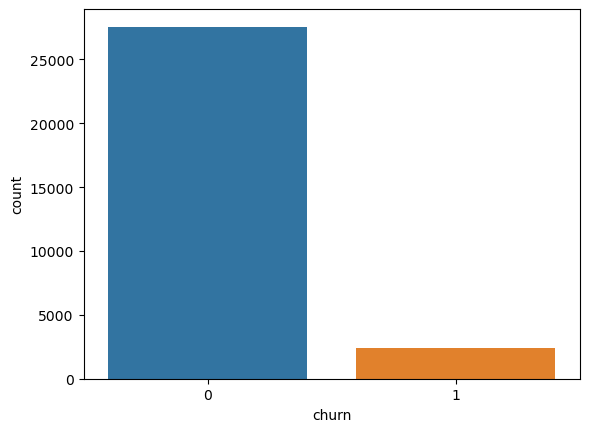

In [29]:
sns.countplot(x = 'churn', data = hv)
plt.show()

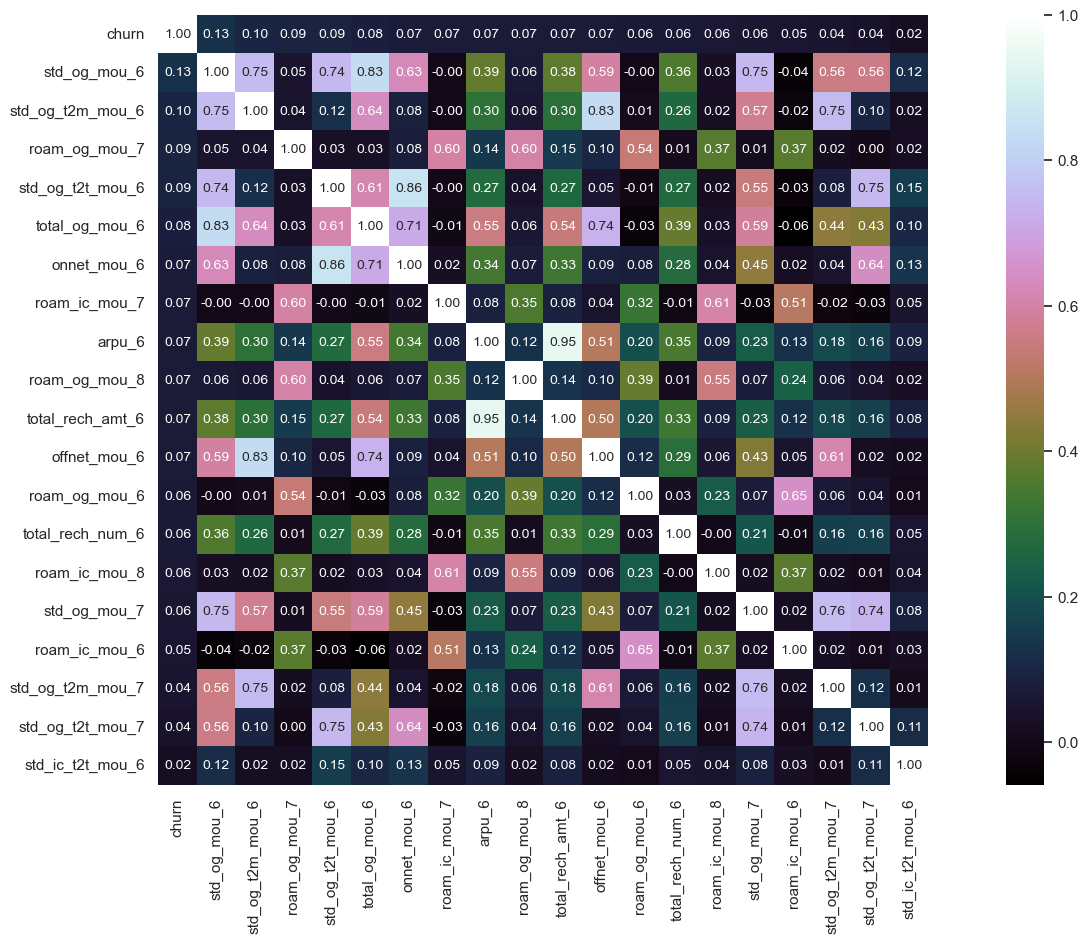

In [36]:
corr = hv.corr()

plt.figure(figsize=[20,10])

k = 20 # number of variables for the heatmap
cols = corr.nlargest(k,'churn')['churn'].index
corrmatrix = np.corrcoef(hv[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='cubehelix')
plt.show()

In [32]:
X = hv.drop('churn', axis=1)
y = hv['churn']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
dt = DecisionTreeClassifier(max_depth=3, random_state=100, class_weight='balanced')

In [43]:
dt.fit(X_train, y_train)

In [44]:
dt_pred= dt.predict(X_test)

In [48]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8251
           1       0.39      0.77      0.52       750

    accuracy                           0.88      9001
   macro avg       0.68      0.83      0.72      9001
weighted avg       0.93      0.88      0.90      9001

Accuracy: 0.880
Precision: 0.388


In [55]:
hv.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_6_combined', 'total_rech_amt_7_combined',
       'av_rech_amt_6_7', 'churn'],
      dtype='object', length=158)